# Assignment objective

We have data from Raleigh, NC, where we recently deployed a flyer program in order to increase public awareness of the possibility of taking a Pagaya loan. You objective is to assess the potency of the flyer program in terms of activation by analyzing production and TU data obtained from the town.


# Basic imports 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

installed=0

# Data preparation

## Data from TU 

To begin with, upload TUs credit information from the relevant quarter (which is 2018Q3). This data is available in our `s3` path under the name `tu_gen_data2018Q3.parquet`. To get to our `s3` path import `DATA_FILES_PATH` from `pagayapro.paths.data_paths`

In [3]:
from pagayapro.paths.data_paths import DATA_FILES_PATH

read the parquet file from `s3`. Only read the columns ["sequence_num", "credit_score", "listing_term", "int_rate", "loan_amnt", "monthly_pmt", "original_state"]

In [4]:
tu_data= pd.read_parquet(
    os.path.join(DATA_FILES_PATH,"tu_gen_data_2018Q3.parquet"),
                columns = ["sequence_num", "credit_score", 
                           "listing_term", "int_rate" ,
                           "loan_amnt", "monthly_pmt", 
                           "original_state"])

Output the first 5 rows of tu_data

In [5]:
tu_data.head()

,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state
id,,,,,,,
adf5219e4cb985352184eb7fa597737e4a9777f7354f7a8a58270da147792561,d0820401b209782dae4284b3dd96b41e08c3e8566fbb33...,814,36.0,7.86,5500.0,172.0,MI
0a0f130443af4c6597bb074942970eaddeb125d398e2cca42175c56befc8a171,2f05cd66cb998e5e55f6f296344b271b2b89b996c7c037...,800,36.0,7.91,20000.0,626.0,NM
4ba9c6a38b650ee06b8b88a48621bd363cdf611e63400c6fc4bbffbd1bf20c47,20bdbfaf0006db032d8a4176add08fd4ef45abfb17c474...,653,36.0,30.51,3674.0,157.0,SD
dae3a344292e07d4b8935a453c37aef01303f21b2f37ccbd1c4408f158533acb,53084498c6bf053a4d1cf309e1b8ec234e503bb1a3dd4e...,623,60.0,23.46,14056.0,400.0,NC
8af2ae2462d012e4d85aa687a16a4f5fb64525928235da43c795f73dc0cadd04,f750c4ecac12ae1c156998ed3dff3f46d2d19f37250074...,627,60.0,25.55,8659.0,257.0,TN


## Activation data 

Your data regarding activation arrives as forms, detailing the loan amount, interest rate offered to the client and whether he or she accepted the offer. These are available on the assignment's `s3` path, which you can import from `pagayapro.path.data_paths` under the name `ASSIGNMENT1_DATA`, in the subdirectory `offers`. 

In [6]:
from pagayapro.paths.data_paths import ASSIGNMENT1_DATA
import glob

Read all files in the subdirectory `offers` of `ASSIGNMENT1_DATA` whose name contains the substring `raleigh`.

In [7]:
raleigh_forms= (
    glob.glob(
        os.path.join(ASSIGNMENT1_DATA,"offers/*raleigh*")
    )
)

how many forms are there?


In [8]:
len(raleigh_forms)

769

Read all the form files and create a table which contains only the last offer given to each borrower. Call this dataframe `raleigh_df`.

In [9]:
raleigh_df = pd.concat([pd.read_csv(path) for path in raleigh_forms], axis=0).groupby("id").last().reset_index()
#write your code here

In [10]:
raleigh_df.head()


,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
0,0000944c6eb064d675539d8deaff65acd38cecfba22862...,65529635d01c24822ffe6bd680ea2a0c7d44f49aa88afb...,5000.0,12.30,False,2019-12-02
1,0003290aea2ca5f7da83d2f32d0c783998906346e99892...,6ce06396232ee6df63e905b2d9e5401030570873c7c3ba...,3300.0,24.88,False,2019-01-29
2,0005ca5ea9f8399dddee878b7c9694d618a9a1b9d09152...,d29ac15bafd56a1444b1b06265d4c67869350f0dd86b58...,3000.0,12.94,False,2020-01-10
3,00205f2f999895bde728aebcd83707fa204ec44e203b97...,6061825c161146555925ce39fb27c935fb5899f39ce94b...,25000.0,13.08,False,2019-07-31
4,002e86fa45263cfe8429dcaa1b37e8abbf57b596e6f45b...,f93f7353e36814e67c17ad06878c2c9f5f810286036b9a...,3816.0,33.77,False,2020-11-23


How many rows are there in your table? How many distict ids?

In [11]:
len(raleigh_df)

8792

In [12]:
len(raleigh_df['id'].unique())

8792

How can you explain the duplicate ids? Sample 5 ids with multiple lines and display them.

<font color = "navy">
When a potential customer is negotiating an offer, he will receive multiple offers with the same ID.<br>
The ID is unique per loan, not per offer / person.  <br>
However, as we already deleted duplicates, this DF contains no duplicate IDs

Drop all lines in the dataframe which contain irrelevant information.

<font color = "navy">
This DF contains no duplicate lines (dropped above)

What is the average interest rate offered to clients? What is the average among clients who accepted the offer?

In [13]:
raleigh_df['offered_interest_rate'].mean()

15.524284576888082

In [14]:
raleigh_df[raleigh_df['offer_accepted']]['offered_interest_rate'].mean()

15.307480314960628

What is the percentage of activation in this dataframe?

In [15]:
raleigh_df['offer_accepted'].sum() / len(raleigh_df)

0.08666969972702457

In [17]:
print("Raleigh's measured activation rate after deployed the flyer program: {:.3%}".format(raleigh_df['offer_accepted'].mean()))

Raleigh's measured activation rate after deployed the flyer program: 8.667%


In [19]:
raleigh_df['offer_accepted'].mean() / 0.0685 * 100 - 100

26.525109090546792

Enrich your dataframe with additioanl TU features by merging it with the `tu_data` df. Note that the two dataframe share the `id` and `sequence_num` features.

In [49]:
raleigh_df.head()

,id,sequence_num,requested_amount,offered_interest_rate,offer_accepted,offer_date
0,0000944c6eb064d675539d8deaff65acd38cecfba22862...,65529635d01c24822ffe6bd680ea2a0c7d44f49aa88afb...,5000.0,12.30,False,2019-12-02
1,0003290aea2ca5f7da83d2f32d0c783998906346e99892...,6ce06396232ee6df63e905b2d9e5401030570873c7c3ba...,3300.0,24.88,False,2019-01-29
2,0005ca5ea9f8399dddee878b7c9694d618a9a1b9d09152...,d29ac15bafd56a1444b1b06265d4c67869350f0dd86b58...,3000.0,12.94,False,2020-01-10
3,00205f2f999895bde728aebcd83707fa204ec44e203b97...,6061825c161146555925ce39fb27c935fb5899f39ce94b...,25000.0,13.08,False,2019-07-31
4,002e86fa45263cfe8429dcaa1b37e8abbf57b596e6f45b...,f93f7353e36814e67c17ad06878c2c9f5f810286036b9a...,3816.0,33.77,False,2020-11-23


In [23]:
merge_raleigh_df = tu_data.merge(raleigh_df, how="right", on=["id", "sequence_num"])

In [24]:
merge_raleigh_df.head()

,id,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state,requested_amount,offered_interest_rate,offer_accepted,offer_date
0,0000944c6eb064d675539d8deaff65acd38cecfba22862...,65529635d01c24822ffe6bd680ea2a0c7d44f49aa88afb...,791,60.0,12.30,5000.0,112.0,NC,5000.0,12.30,False,2019-12-02
1,0003290aea2ca5f7da83d2f32d0c783998906346e99892...,6ce06396232ee6df63e905b2d9e5401030570873c7c3ba...,645,36.0,24.88,3300.0,131.0,NC,3300.0,24.88,False,2019-01-29
2,0005ca5ea9f8399dddee878b7c9694d618a9a1b9d09152...,d29ac15bafd56a1444b1b06265d4c67869350f0dd86b58...,703,36.0,12.94,3000.0,101.0,NC,3000.0,12.94,False,2020-01-10
3,00205f2f999895bde728aebcd83707fa204ec44e203b97...,6061825c161146555925ce39fb27c935fb5899f39ce94b...,692,60.0,13.08,25000.0,570.0,NC,25000.0,13.08,False,2019-07-31
4,002e86fa45263cfe8429dcaa1b37e8abbf57b596e6f45b...,f93f7353e36814e67c17ad06878c2c9f5f810286036b9a...,606,36.0,33.77,3816.0,170.0,NC,3816.0,33.77,False,2020-11-23


What is the average credit score of the clients? What is the average among clients who accepted the offer?

In [25]:
merge_raleigh_df.credit_score.mean()

689.821542311192

In [26]:
merge_raleigh_df[merge_raleigh_df["offer_accepted"]].credit_score.mean()

702.5446194225722

# Validations

Before we embark on a statistical test, let's do some validations to make sure that the Raleig sample is not somehow distinct from the general population. Our random sample from the general population is the TU data.

Create a histogram to describe the distribution of requested loan amounts in Raleigh and in the general population. Do the distributions look similar? (A good rule-of-thumb for the number of bins to use is the square-root of the number of unique value.)

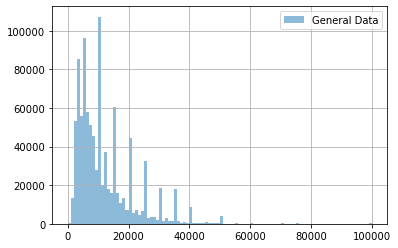

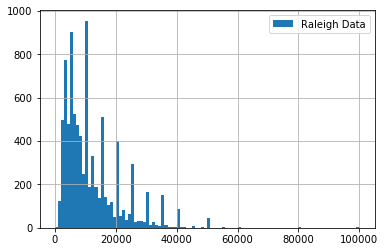

In [54]:
tu_data["loan_amnt"].hist(bins=100,  label='General Data', alpha=0.5,range=(0, 100000))
plt.legend()
plt.show()
merge_raleigh_df["loan_amnt"].hist(bins=100, label='Raleigh Data', range=(0, 100000))
#tu_data["loan_amnt"].hist(bins=100, label='General Data')
plt.legend()
plt.show()



Describe the loan amount distribution using `sns.distplot` in the Raleigh dataframe and in TU.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

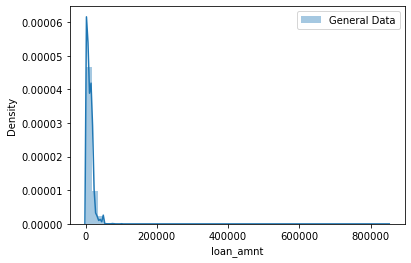

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

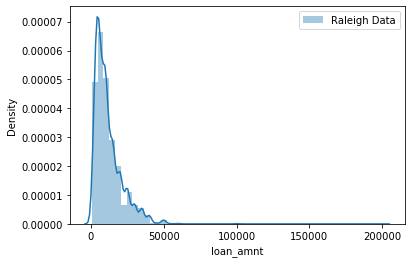

In [55]:
sns.distplot(tu_data["loan_amnt"], label='General Data')
plt.legend()
plt.show()
sns.distplot(merge_raleigh_df["loan_amnt"], label='Raleigh Data')
#tu_data["loan_amnt"].hist(bins=100, label='General Data')
plt.legend()
plt.show()

We also want to verify that the offered interest rate in Raleigh seem similar to those in the general population. 
Create a histogram to describe the distribution of offered interest rates in Raleigh and interest rates in the general population. Do the distributions look similar?

<font color = "navy">
    Yes. As we can see from the histograms, the distributions look similar.

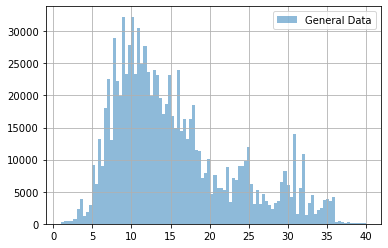

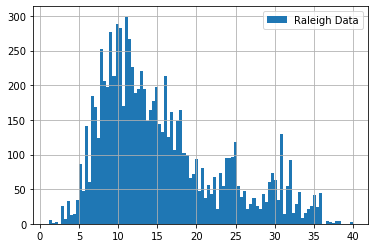

In [63]:
tu_data["int_rate"].hist(bins=100,  label='General Data', alpha=0.5)
plt.legend()
plt.show()
merge_raleigh_df["offered_interest_rate"].hist(bins=100, label='Raleigh Data')
#tu_data["loan_amnt"].hist(bins=100, label='General Data')
plt.legend()
plt.show()


Describe the interest rate distribution using `sns.distplot` in the Raleigh dataframe and in TU.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

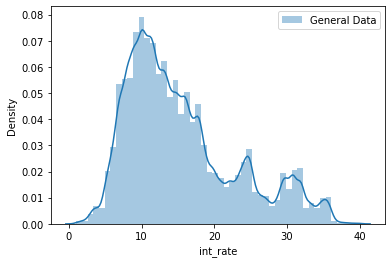

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

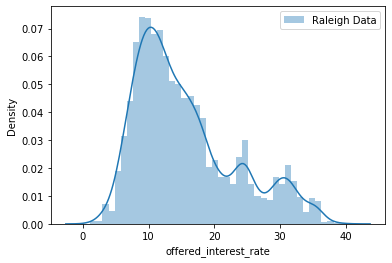

In [64]:
sns.distplot(tu_data["int_rate"], label='General Data')
plt.legend()
plt.show()
sns.distplot(merge_raleigh_df["offered_interest_rate"], label='Raleigh Data')
#tu_data["loan_amnt"].hist(bins=100, label='General Data')
plt.legend()
plt.show()

Additionally, we want to make sure the credit scores are not visibly different in Raleigh from the general population, as this might mean that the data we obtained from the town might not be representative of the general popuation.

Create a histogram to describe the distribution of credit scores in the Raleigh sample and in the general population. Do the distributions look similar? How many bins did you use?



<font color = "navy">

Yes, the distributions look similar. We used 100 bins. 

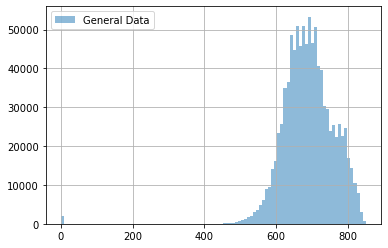

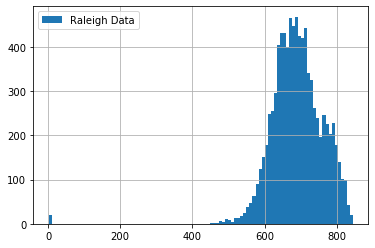

In [70]:
tu_data["credit_score"].hist(bins=100,  label='General Data', alpha=0.5)
plt.legend()
plt.show()
merge_raleigh_df["credit_score"].hist(bins=100, label='Raleigh Data')
#tu_data["loan_amnt"].hist(bins=100, label='General Data')
plt.legend()
plt.show()

Describe the credit score distribution using `sns.distplot`  in the Raleigh dataframe and in TU.

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

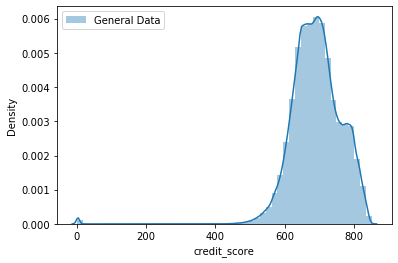

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

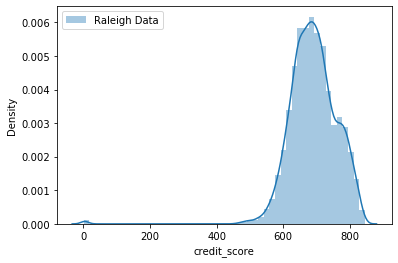

In [69]:
sns.distplot(tu_data["credit_score"], label='General Data')
plt.legend()
plt.show()
sns.distplot(merge_raleigh_df["credit_score"], label='Raleigh Data')
#tu_data["loan_amnt"].hist(bins=100, label='General Data')
plt.legend()
plt.show()

Finally, check whether the loans in both datasets have similar distributions of term (i.e. the amount of months the borrower takes the loan for). What values of term exist in the data?

In [72]:
tu_data["listing_term"].value_counts()

36.0    542102
60.0    430621
Name: listing_term, dtype: int64

<font color = "navy">
The term values are either 36 or 60 months

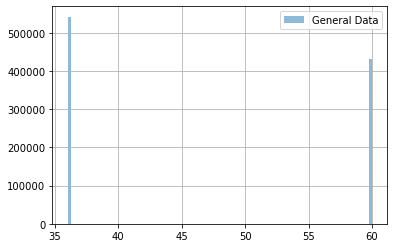

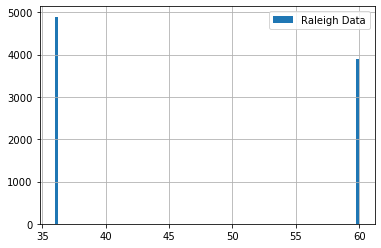

In [73]:
tu_data["listing_term"].hist(bins=100,  label='General Data', alpha=0.5)
plt.legend()
plt.show()
merge_raleigh_df["listing_term"].hist(bins=100, label='Raleigh Data')
#tu_data["loan_amnt"].hist(bins=100, label='General Data')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

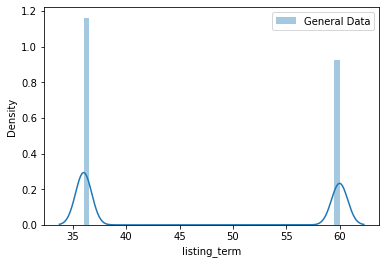

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

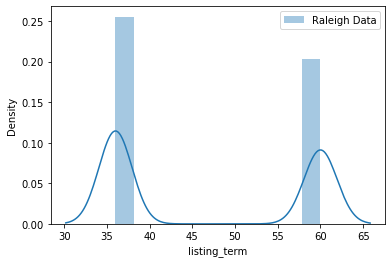

In [74]:
sns.distplot(tu_data["listing_term"], label='General Data')
plt.legend()
plt.show()
sns.distplot(merge_raleigh_df["listing_term"], label='Raleigh Data')
#tu_data["loan_amnt"].hist(bins=100, label='General Data')
plt.legend()
plt.show()

# CLT in action

One more thing before we start the test. Our goal is to check whether, for which we'll run some statistical test (you probably already know which) which checks if something belongs to a noraml distribution with some mean and some variance. But... is activation normally distributed in the Raliegh sample? 

In [75]:
#+2 points if you answer without plotting


<font color = "navy">
The activation is Bernoulli distributed, as it is a discrete parameter, taking the values 0 or 1.

The reason why we can assume normality is because we're checking averages of samples and we're relying on the Central Limit Theorem. We won't prove the theorem, but let's test it for a bit. 

Write a function which takes a pandas series S and a natural number n and creates a series of means of samples (with replacement) of n entries from S. Decide for yourself on the length of the output series. You can also use a different data structure if you find it more suitable as the output.

In [27]:
def random_sample_mean(S, n):
    n_means = 1000
    res = []
    for idx in range(n_means):
        res.append(S.sample(n, replace=True).mean())
    return pd.Series(res)

In [79]:
rand_means_data = random_sample_mean(merge_raleigh_df["offer_accepted"], 1000)
print(rand_means_data.mean())

0.086778


Optionally- also create a function which, given the same input as above, plots a histogram of the series of means, and also indicates the mean of this series.

In [28]:
def random_sample_mean2(S, n):
    n_means = 10000
    #res = []
    #for idx in range(n_means):
        #res.append(S.sample(n, replace=True).mean())
    res = (np.random.choice(S, size=(n_means, n), replace=True).mean(axis=1))
    #res = pd.Series(res)
    plt.hist(res, bins=100, alpha=0.5)
    plt.title("Distribution of sample means, "+str(n_means)+" means, "+str(n)+" samples per mean", size=16)
    print("The mean of means is: ",res.mean())
    
    return res

Generate plots of the series of means of activation in Raleigh and in TU for n = 1, 2, 5, 10, 100, 1000 and 1e6, and indicate their means. Does the distribution approach a normal distribution as $n\to\infty$ in your opinion?

The mean of means is:  0.0898


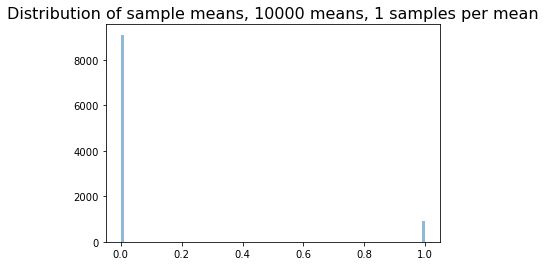

The mean of means is:  0.0882


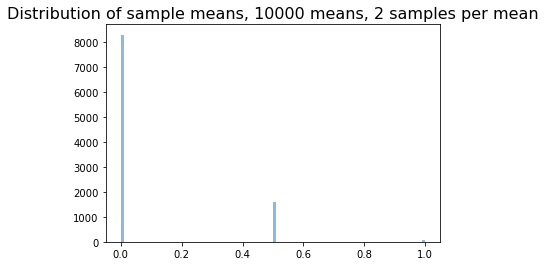

The mean of means is:  0.08674000000000001


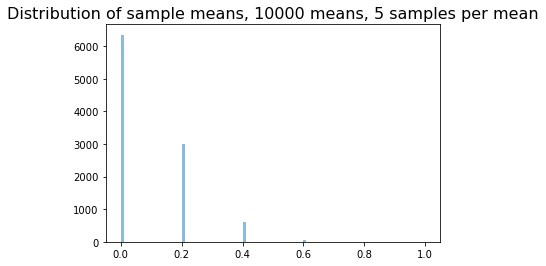

The mean of means is:  0.08495


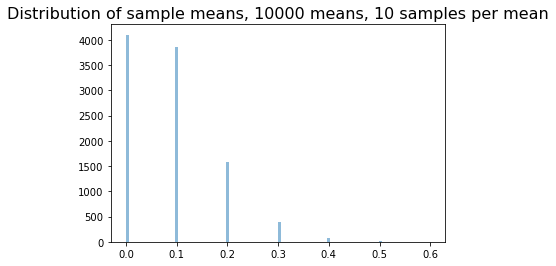

The mean of means is:  0.086262


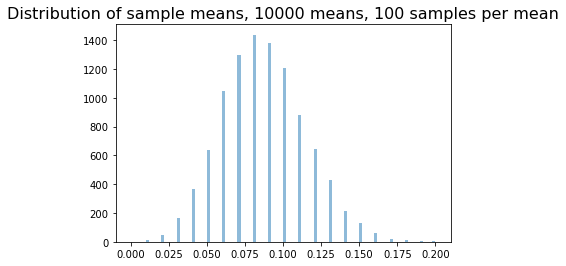

The mean of means is:  0.0866021


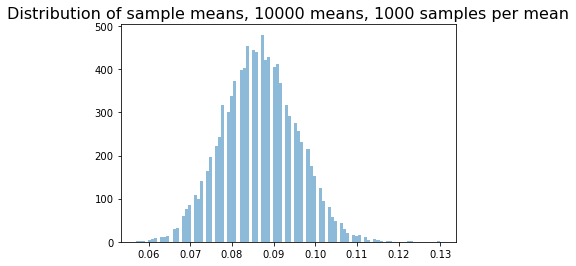

The mean of means is:  0.0866717638


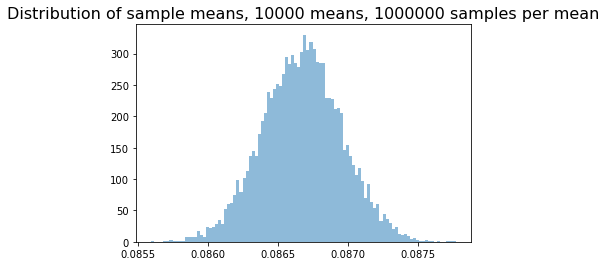

In [81]:
n_list = [1, 2, 5, 10, 100, 1000, 1000000]
for n in n_list:
    rand_means_data = random_sample_mean2(merge_raleigh_df["offer_accepted"], n)
    plt.show()

<font color = "navy">
No, we can see that in order for the distribution to seem normally-similar, we need both parameters n, n_means (number of samples per mean, and number of means, respectively) to approach infinity (or just be large enough).

Now that your fuction is ready, it's time to make it part of our infrastucture:
* Inside the `pagayapro` repo, create a branch called `feature/{your_user_name}/clt_tester/`.
* Create a file called `clt.py` inside `~/pagayapro/users/{user_name}/assignment1/` 
* Copy the two finctions you just created into the file.
* Push your file to `main`, open a PR and ask your mentor to review it. Once approved, rebase and merge.

# Statistical test 

As mentioned in the Notion doc, the activation in Raleigh before deployment was measured at 6.85%. In this section, you will run a test to check whether the activation in Raleigh is indeed different following the flyer program. 

In [29]:
if not installed:
    !pip install statsmodels
    installed = 1
from statsmodels.stats.proportion import proportions_ztest

Run a statistical test to check whether the current activation rate in Raleigh is different from 6,85%:
1. What are your hypotheses?
2. Setting your confidence level at 95%, what is the probability of an error of type I in your test? What is the probability of a type II error? What is the power of your test?
3. Is the sample mean significantly different from the past value of 6.85?
4. Interpret your results. Can you declare the program as successful in increasing activation (what is the probability of wrongfully declaring it successful)?
5. Are there any other possible explanations for the change in activation that you observed? Discuss the possible drawbacks of our current test.

Use `proportions_ztest` from `statsmodels.stats.proportion` in order to perform the test. Are your results significant?

In [33]:
alpha = 0.05
z_test, p_value = proportions_ztest(
    sum(merge_raleigh_df["offer_accepted"]),
    len(merge_raleigh_df),
    value=0.0685,
    alternative='two-sided',
    prop_var=False)


if p_value < alpha:
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothsis")
    
z_test, p_value_one_sided = proportions_ztest(
    sum(merge_raleigh_df["offer_accepted"]),
    len(merge_raleigh_df),
    value=0.0685,
    alternative='larger',
    prop_var=False)

if (p_value_one_sided < alpha/2) and (merge_raleigh_df["offer_accepted"].mean() > 0.0685):
    print("We decalare the flyer program as successful!")
else:
    print("We cannot declare the flyer program as successful :(")
    
print("Our one-sided p value is: ",p_value_one_sided)

We reject the null hypothesis
We decalare the flyer program as successful!
Our one-sided p value is:  7.002745871481786e-10


<font color = "navy">
<ol>
    <li>
        H0 = Current activation rate in Raleigh is 6.85% <br>
        H1 = Current activation rate in Raleigh is not 6.85%
    </li>
    <li>
        The probability of a type I error is $\alpha$ = 1 - CL = 1 - 0.95 = 0.05 <br>
    </li>
    <li>
        Yes, the sample mean is 0.0867, which is 26.6% larger than 0.0685. <br>
        Such an improvement in activation could result in a 26.6% increase in Pagaya's revenue!
    </li>
    <li>
        Yes, we would declare the program as successful, increasing the activation significantly <br>
        The probability of wrongfully declaring the program as successful is 2.5% ($\alpha$/2, as this is a one-sided type I error)
    </li>
    <li>
        As the data could not be collected in such way that the only influencing factor changed is the flyer program, there is a possibility that a different factor was increasing the activation and we would mistakenly conclude the program as successful.<br>
        The data was collected during different time spans, hence a possible change in the activation could be caused due to a change in ambient factors such as macro-economics factors, regional factors (e.g. a recent hurricane damaged property and more people would need loans for repairs), and more.
    </li>

Do you see any possible problems in your methodology? What other factors can explain the change in activation, if such a change exists?

<font color = "navy">
From 5. above:
    <br>
        As the data could not be collected in such way that the only influencing factor changed is the flyer program, there is a possibility that a different factor was increasing the activation and we would mistakenly conclude the program as successful.<br>
        The data was collected during different time spans, hence a possible change in the activation could be caused due to a change in ambient factors such as macro-economics factors, regional factors (e.g. a recent hurricane damaged property and more people would need loans for repairs), and more.

# A/b test

In order to isolate temporal and environmental effects on activation, we'll run an a/b test, comparing the activation rate in Raleigh to that of Lubbock, TX, another town in which Pagaya operates without a flyer program. 

The activation forms for Lubbock also appear in the `offers` subdirectory of the `ASSIGNMENT1_DATA` folder. Read all files from this folder whose name contains the substring 'lubbock', and create a dataframe of final offers called `lubbock_df`, drop unnecessary rows from it, and enrich it with TU features.

In [34]:
lubbock_forms= (
    glob.glob(
        os.path.join(ASSIGNMENT1_DATA,"offers/*lubbock*")
    )
)

In [35]:
lubbock_df = pd.concat([pd.read_csv(path) for path in lubbock_forms], axis=0).groupby("id").last().reset_index()

In [36]:
merge_lubbock_df = tu_data.merge(lubbock_df, how="right", on=["id", "sequence_num"])

In [37]:
merge_lubbock_df.head()

,id,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state,requested_amount,offered_interest_rate,offer_accepted,offer_date
0,00081387dcef0fab60c7f9f94669cc6df140531c9e0a55...,35357872fbcfec327a4c7665f08a98f0dc55eb19969f36...,735,36.0,8.24,4070.0,128.0,TX,4070.0,8.24,False,2020-07-10
1,00090fdbe1fc33bf53dda546318c248cb6fe4299ad39dd...,6c98c998cb4bd242edbd55164eeed3927372264f8395b8...,636,36.0,16.68,5550.0,197.0,TX,5550.0,16.68,False,2020-06-02
2,000aa5e29eadd0bd7e2c9649d0ed986af4848895b6a4fa...,921cda1c86bc82347ea8168a894918f8ae857cdbbdb9a5...,664,36.0,7.18,25000.0,774.0,TX,25000.0,7.18,False,2019-06-19
3,001046cb99ae36567910bdd6fd907622cdc8aefb1689d6...,0637e25695fcabdcec43d21364397793a169bd8b6977ed...,819,60.0,6.68,20000.0,393.0,TX,20000.0,6.68,False,2018-02-20
4,00176f09e7f3c4c864098d84a1f07e632fcce67f4d8d1b...,1448249d369054a06a82acb4003d3daee61574935da0a8...,780,36.0,8.99,10000.0,318.0,TX,10000.0,8.99,False,2019-09-27


In [38]:
merge_raleigh_df.head()

,id,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state,requested_amount,offered_interest_rate,offer_accepted,offer_date
0,0000944c6eb064d675539d8deaff65acd38cecfba22862...,65529635d01c24822ffe6bd680ea2a0c7d44f49aa88afb...,791,60.0,12.30,5000.0,112.0,NC,5000.0,12.30,False,2019-12-02
1,0003290aea2ca5f7da83d2f32d0c783998906346e99892...,6ce06396232ee6df63e905b2d9e5401030570873c7c3ba...,645,36.0,24.88,3300.0,131.0,NC,3300.0,24.88,False,2019-01-29
2,0005ca5ea9f8399dddee878b7c9694d618a9a1b9d09152...,d29ac15bafd56a1444b1b06265d4c67869350f0dd86b58...,703,36.0,12.94,3000.0,101.0,NC,3000.0,12.94,False,2020-01-10
3,00205f2f999895bde728aebcd83707fa204ec44e203b97...,6061825c161146555925ce39fb27c935fb5899f39ce94b...,692,60.0,13.08,25000.0,570.0,NC,25000.0,13.08,False,2019-07-31
4,002e86fa45263cfe8429dcaa1b37e8abbf57b596e6f45b...,f93f7353e36814e67c17ad06878c2c9f5f810286036b9a...,606,36.0,33.77,3816.0,170.0,NC,3816.0,33.77,False,2020-11-23


What is the average interest rate in Lubbock? What is it among accepting borrowers?

In [39]:
merge_lubbock_df["int_rate"].mean()

15.505397526501767

In [40]:
merge_lubbock_df[merge_lubbock_df["offer_accepted"]]["int_rate"].mean()

13.553895131086144

What is the average credit score in Lubbock? What is it among accepting borrowers?

In [41]:
merge_lubbock_df["credit_score"].mean()

690.0338339222615

In [42]:
merge_lubbock_df[merge_lubbock_df["offer_accepted"]]["credit_score"].mean()

730.5337078651686

What is the rate of activation in Lubbock?

In [43]:
merge_lubbock_df["offer_accepted"].mean()

0.04717314487632509

## Caution about a/b test 

Note that this is not a classical a/b test. Usually, in such a test, one creates two random subgroups from the general population and applies a manipulation to one of them in order to see if the manipulation had an effect. However, in this case, it is very complicated to isolate a random subgroup from any population and deploy the flyer program only on it.
Thus, due to production limitation, we have to make do with what we got.

In order to justify the use of an a/b test for this situation, we should at least verify that the borrower population in Lubbock and Raleigh seem as though they were randomly selected from the general population. We have actually already checked it for Raleigh above. Add TU features to the loan amount, interest rate, credit score and term comparisons and see if there any major differences between the three populations (Lubbock, Raleigh and TU).

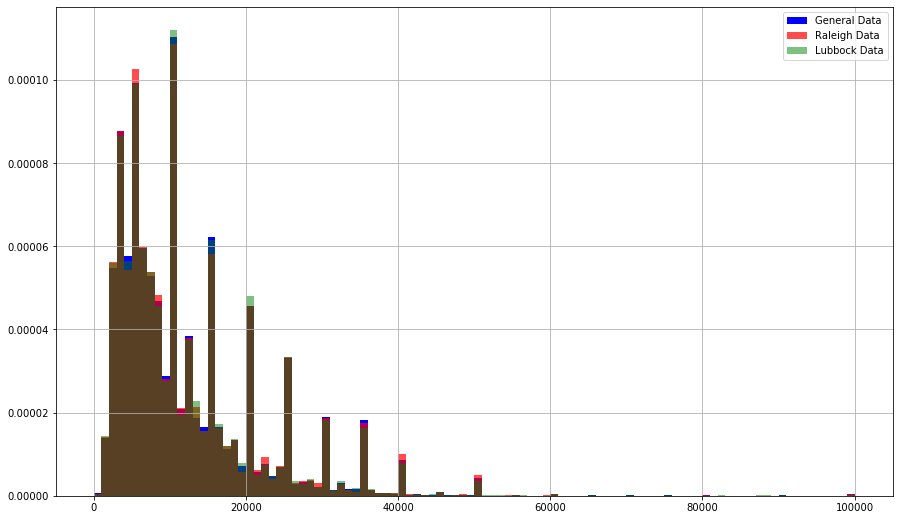

In [44]:
fig = tu_data["loan_amnt"].hist(bins=100,  label='General Data', alpha=1,range=(0, 100000), density=True, figsize=(15, 9), color='b')
merge_raleigh_df["loan_amnt"].hist(bins=100, label='Raleigh Data', alpha=0.7, range=(0, 100000), density=True, color='r')
merge_lubbock_df["loan_amnt"].hist(bins=100, label='Lubbock Data',alpha=0.5, range=(0, 100000), density=True, color='g')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

Text(0.5, 1.0, 'Loan amount distribution comparison')

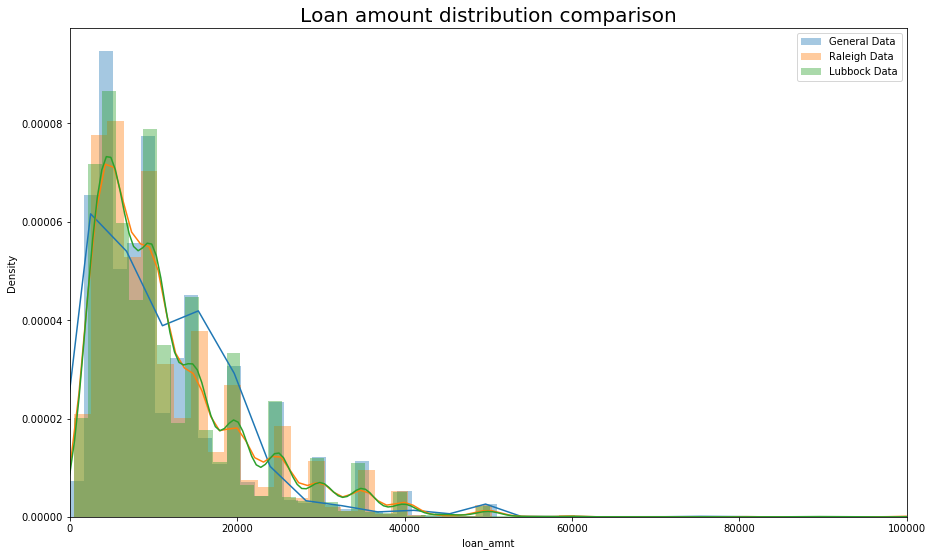

In [73]:
fig = plt.figure(figsize=(15, 9))
sns.distplot(tu_data["loan_amnt"], bins=500, label='General Data')
sns.distplot(merge_raleigh_df["loan_amnt"], bins=100, label='Raleigh Data')
sns.distplot(merge_lubbock_df["loan_amnt"], bins=60, label='Lubbock Data')
plt.xlim(0, 100000);
plt.legend()
plt.title("Loan amount distribution comparison", size=20);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

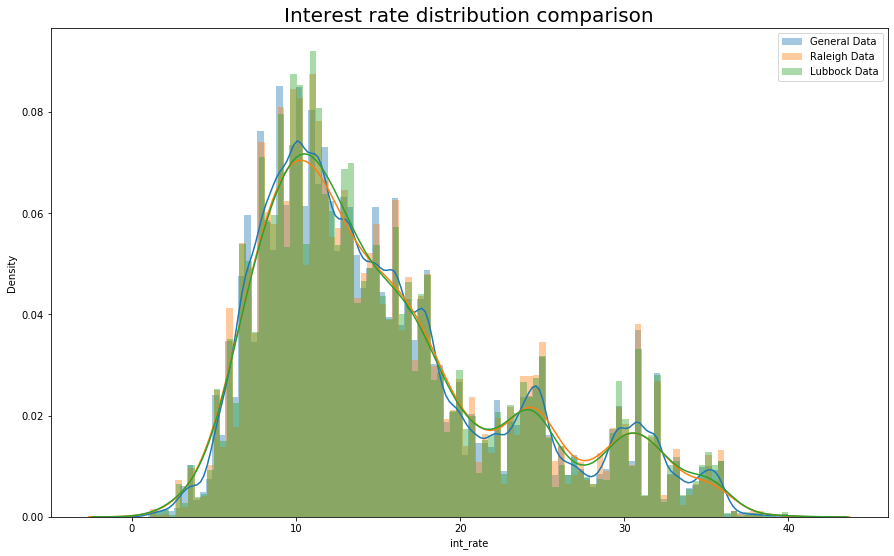

In [74]:
fig = plt.figure(figsize=(15, 9))
sns.distplot(tu_data["int_rate"], bins=100, label='General Data')
sns.distplot(merge_raleigh_df["int_rate"], bins=100, label='Raleigh Data')
sns.distplot(merge_lubbock_df["int_rate"], bins=100, label='Lubbock Data')
#plt.xlim(0, 100000);
plt.legend()
plt.title("Interest rate distribution comparison", size=20);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

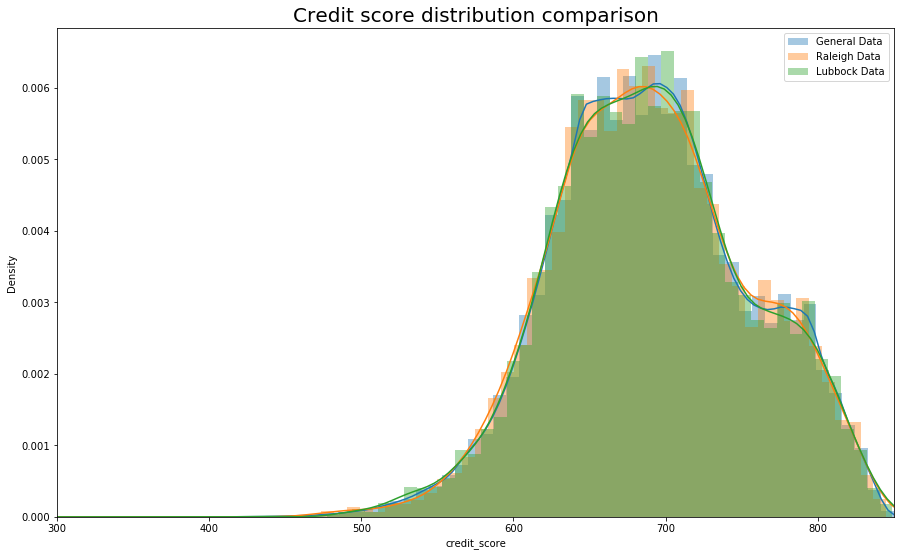

In [75]:
fig = plt.figure(figsize=(15, 9))
sns.distplot(tu_data["credit_score"], bins=100, label='General Data')
sns.distplot(merge_raleigh_df["credit_score"], bins=100, label='Raleigh Data')
sns.distplot(merge_lubbock_df["credit_score"], bins=100, label='Lubbock Data')
plt.xlim(300, 850);
plt.legend();
plt.title("Credit score distribution comparison", size=20);

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.8/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dime

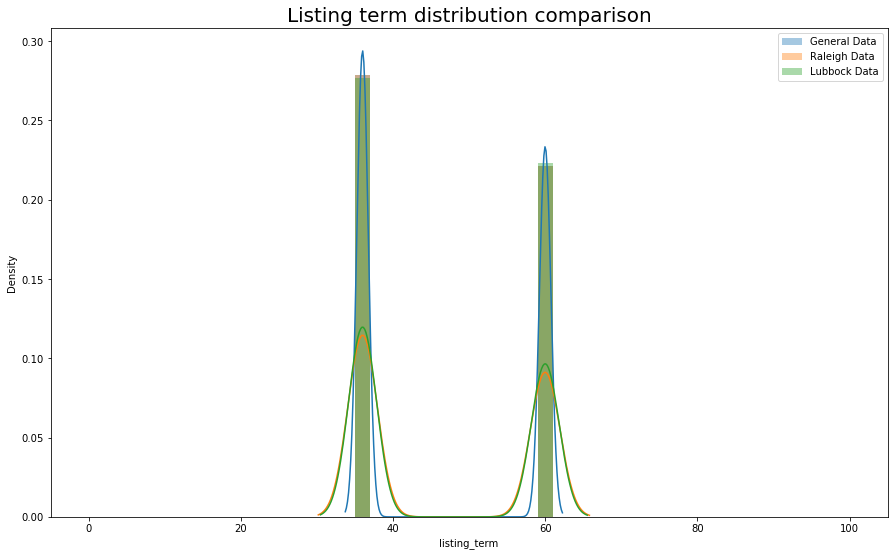

In [76]:
fig = plt.figure(figsize=(15, 9))
bins = [0, 35, 37, 59, 61, 100]
sns.distplot(tu_data["listing_term"], label='General Data', bins=bins)
sns.distplot(merge_raleigh_df["listing_term"], label='Raleigh Data', bins=bins)
sns.distplot(merge_lubbock_df["listing_term"], label='Lubbock Data', bins=bins)
plt.legend();
plt.title("Listing term distribution comparison", size=20);

<font color = "navy">
The 3 populations seem to have very similar distributions of the 4 factors (loan amount, interest rate, credit score and listing term)<br>
We can conclude that the A/B test is indeed justified

## Performing the test

Use the function you created in the file `clt.py` to plot the series of means of activation in Raleigh and Lubbock for samples of size n= 1, 10, 1000 and 1e6, and compare the means of the two histograms. Do they seem to converge to the same value?

The mean of means is:  0.0886
The mean of means is:  0.0446


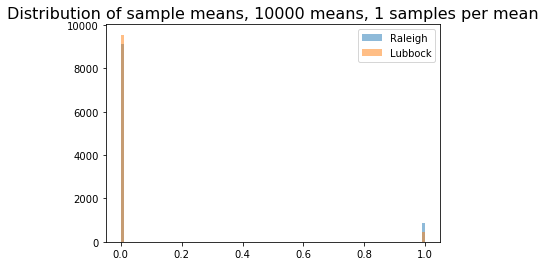

The mean of means is:  0.08717000000000001
The mean of means is:  0.04592


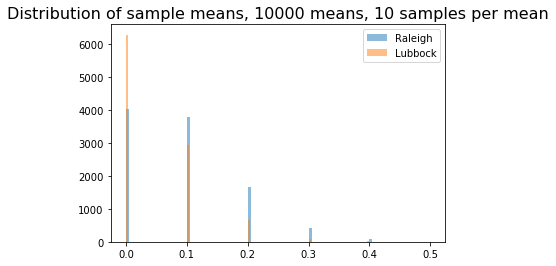

The mean of means is:  0.08675149999999998
The mean of means is:  0.04714270000000001


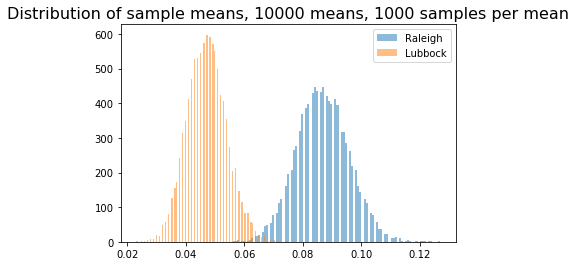

The mean of means is:  0.0866667522
The mean of means is:  0.047173799200000005


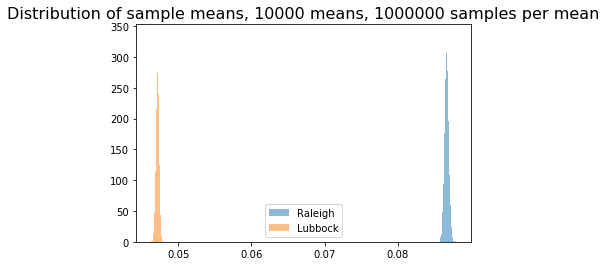

In [49]:
n_list = [1, 10, 1000, 1000000]
for n in n_list:
    rand_means_ral = random_sample_mean2(merge_raleigh_df["offer_accepted"], n)
    rand_means_lub = random_sample_mean2(merge_lubbock_df["offer_accepted"], n)
    plt.legend(["Raleigh", "Lubbock"])
    plt.show()

Apply a statistical test to see whether the activation rate in Raleigh, NC is significantly larger than Lubbock, TX. Clearly state and validate your test's assumption. 

1. What are your hypotheses?
2. Setting your confidence level at 95%, what is the probability of an error of type I in your test? What is the probability of a type II error?
3. Are the two samples significantly different? 
4. Interpret your results. Can you declare the program as successful in increasing activation? What is the probability of wrongfully declaring it successful?

<font color = "navy">
<ol>
    <li>
        H0 = Activation rate in Raleigh is equal or smaller than activation rate in Lubbock<br>
        H1 = Activation rate in Raleigh is larger than activation rate in Lubbock
    </li>
    <li>
        The probability of a type I error is $\alpha/2 = (1 - CL)/2 = (1 - 0.95)/2 = 0.025$ <br>
    </li>
    <li>
        Yes, the two samples are significantly different. As we can see in the cell below containing the statistical test, the p value is smaller than 0.5$\alpha$, hence we can conclude with the required confidence interval that they are statistically different.
    </li>
    <li>
        As we found statistical significance, and that the activation rate in Raleigh is larger than activation rate in Lubbock, we can declare the program as successful.<br>
        The probability of wrongfully declaring the program as successful is $\alpha/2 = 0.025$
        
    </li>

Use the `proportions_ztestz` function from `statsmodels.stats.proportion` to perform a comparison between the activation probability in Lubbock and in Raleigh. 

In [50]:
counts = np.array([np.sum(merge_raleigh_df["offer_accepted"]), np.sum(merge_lubbock_df["offer_accepted"])])
nobs = np.array([len(merge_raleigh_df), len(merge_lubbock_df)])
alpha = 0.05

z_test, p_value_one_sided = proportions_ztest(
    counts,
    nobs,
    alternative='larger',
    prop_var=False)

print("The p-value is:", p_value_one_sided)
if (p_value_one_sided < alpha/2) and (merge_raleigh_df["offer_accepted"].mean() > merge_lubbock_df["offer_accepted"].mean()):
    print("We conclude flyer program as successful!")
else:
    print("We cannot declare the flyer program as successful")

The p-value is: 5.475858880145861e-30
We conclude flyer program as successful!


Interprest your results; do you observe a significant change in activation in Raleigh? What is the probability of wrongfully declaring the program successful?

<font color = "navy">
From 4. above:<br>
As we found statistical significance, and that the activation rate in Raleigh is larger than activation rate in Lubbock, we can declare the program as successful.<br>
The probability of wrongfully declaring the program as successful is $\alpha/2 = 0.025$

# Testing for activation in sub-populations

Now that you applied the a/b test to the Lubbock and Raleigh datasets, it is now required that you make a similar comparison on different subsets of the data within various credit score and loan amount bins. To do so, let us first decide on how to segment our data.

You are asked to divide your data into 10 bins according to loan amount, and then divide each of those bins into 10 bins according to loan amount. The most staightforward way of doing this is by using the `pd.qcut` function; first dividing the data into 10 quantiles of credit score and then dividing each of these quantiles into 10 according to loan amount.

Divide your datasets as above and add two columns to your data which indicate the (credit_score, loan_amnt) of the bin.

In [77]:
cols = tu_data.columns.values
print(cols)
print(merge_raleigh_df.columns.values)
tu_data["credit_score_bin"] = pd.qcut(tu_data["credit_score"], 10, labels=range(10))
tu_data["loan_amnt_bin"] = 0

for credit_bin in range(10):
    tu_data.loc[tu_data["credit_score_bin"]==credit_bin, ['loan_amnt_bin']] = pd.qcut(tu_data[tu_data["credit_score_bin"]==credit_bin]["loan_amnt"], 10, labels=range(10))

['sequence_num' 'credit_score' 'listing_term' 'int_rate' 'loan_amnt'
 'monthly_pmt' 'original_state' 'credit_score_bin' 'loan_amnt_bin']
['id' 'sequence_num' 'credit_score' 'listing_term' 'int_rate' 'loan_amnt'
 'monthly_pmt' 'original_state' 'requested_amount' 'offered_interest_rate'
 'offer_accepted' 'offer_date']


In [78]:
merge2_raleigh_df = merge_raleigh_df.merge(tu_data, how="left", on=['sequence_num', 'credit_score', 'listing_term', 'int_rate', 'loan_amnt',
 'monthly_pmt', 'original_state'])
merge2_raleigh_df.head()

,id,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state,requested_amount,offered_interest_rate,offer_accepted,offer_date,credit_score_bin,loan_amnt_bin
0,0000944c6eb064d675539d8deaff65acd38cecfba22862...,65529635d01c24822ffe6bd680ea2a0c7d44f49aa88afb...,791,60.0,12.30,5000.0,112.0,NC,5000.0,12.30,False,2019-12-02,9,1
1,0003290aea2ca5f7da83d2f32d0c783998906346e99892...,6ce06396232ee6df63e905b2d9e5401030570873c7c3ba...,645,36.0,24.88,3300.0,131.0,NC,3300.0,24.88,False,2019-01-29,2,1
2,0005ca5ea9f8399dddee878b7c9694d618a9a1b9d09152...,d29ac15bafd56a1444b1b06265d4c67869350f0dd86b58...,703,36.0,12.94,3000.0,101.0,NC,3000.0,12.94,False,2020-01-10,5,0
3,00205f2f999895bde728aebcd83707fa204ec44e203b97...,6061825c161146555925ce39fb27c935fb5899f39ce94b...,692,60.0,13.08,25000.0,570.0,NC,25000.0,13.08,False,2019-07-31,5,8
4,002e86fa45263cfe8429dcaa1b37e8abbf57b596e6f45b...,f93f7353e36814e67c17ad06878c2c9f5f810286036b9a...,606,36.0,33.77,3816.0,170.0,NC,3816.0,33.77,False,2020-11-23,0,3


In [79]:
merge2_lubbock_df = merge_lubbock_df.merge(tu_data, how="left", on=['sequence_num', 'credit_score', 'listing_term', 'int_rate', 'loan_amnt',
 'monthly_pmt', 'original_state'])
merge2_lubbock_df.head()


,id,sequence_num,credit_score,listing_term,int_rate,loan_amnt,monthly_pmt,original_state,requested_amount,offered_interest_rate,offer_accepted,offer_date,credit_score_bin,loan_amnt_bin
0,00081387dcef0fab60c7f9f94669cc6df140531c9e0a55...,35357872fbcfec327a4c7665f08a98f0dc55eb19969f36...,735,36.0,8.24,4070.0,128.0,TX,4070.0,8.24,False,2020-07-10,7,1
1,00090fdbe1fc33bf53dda546318c248cb6fe4299ad39dd...,6c98c998cb4bd242edbd55164eeed3927372264f8395b8...,636,36.0,16.68,5550.0,197.0,TX,5550.0,16.68,False,2020-06-02,1,4
2,000aa5e29eadd0bd7e2c9649d0ed986af4848895b6a4fa...,921cda1c86bc82347ea8168a894918f8ae857cdbbdb9a5...,664,36.0,7.18,25000.0,774.0,TX,25000.0,7.18,False,2019-06-19,3,9
3,001046cb99ae36567910bdd6fd907622cdc8aefb1689d6...,0637e25695fcabdcec43d21364397793a169bd8b6977ed...,819,60.0,6.68,20000.0,393.0,TX,20000.0,6.68,False,2018-02-20,9,7
4,00176f09e7f3c4c864098d84a1f07e632fcce67f4d8d1b...,1448249d369054a06a82acb4003d3daee61574935da0a8...,780,36.0,8.99,10000.0,318.0,TX,10000.0,8.99,False,2019-09-27,8,3


Run an a/b test on each of the bins in your data and create a $10\times 10$ table containing the $p$ value of each test.

In [80]:
p_value_matrix = np.zeros((10, 10))
mean_mat = np.zeros((10, 10))

raleigh_groups = merge2_raleigh_df.groupby(['credit_score_bin', 'loan_amnt_bin'])['offer_accepted'].agg(['count','sum', 'mean'])
lubbock_groups = merge2_lubbock_df.groupby(['credit_score_bin', 'loan_amnt_bin'])['offer_accepted'].agg(['count', 'sum', 'mean'])

for i in range(10):
    for j in range(10):
        mean_mat[i, j] = raleigh_groups.loc[(i, j), "mean"] - lubbock_groups.loc[(i, j), "mean"]
        counts = [raleigh_groups.loc[(i, j), "sum"], lubbock_groups.loc[(i, j), "sum"]]
        nobs = [raleigh_groups.loc[(i, j), "count"], lubbock_groups.loc[(i, j), "count"]]

        _, p_value_matrix[i, j] =  proportions_ztest(
            counts,
            nobs,
            alternative='larger',
            prop_var=False)




/usr/local/lib/python3.8/dist-packages/statsmodels/stats/weightstats.py:790: RuntimeWarning: invalid value encountered in double_scalars
  zstat = value / std


Use the [seaborn.heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html) function to represent your table as a heatmap. You can also use it on a suitable table of boolean values to get a more robus representation of which experiments turned out significant.

<ipython-input-88-4ae0f1d40dee>:1: RuntimeWarning: invalid value encountered in less
  sns.heatmap(p_value_matrix < 0.05);


Text(0.5, 1, 'Statistical test per sub-population')

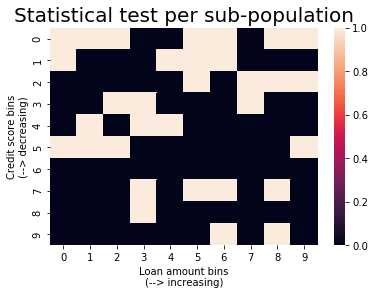

In [88]:
sns.heatmap(p_value_matrix < 0.05);
plt.xlabel("Loan amount bins\n(--> increasing)")
plt.ylabel("Credit score bins\n(--> decreasing)")
plt.title("Statistical test per sub-population", size=20)

<ipython-input-56-5fb11a2a1451>:1: RuntimeWarning: invalid value encountered in less
  sns.heatmap((p_value_matrix < 0.025) & (mean_mat > 0))


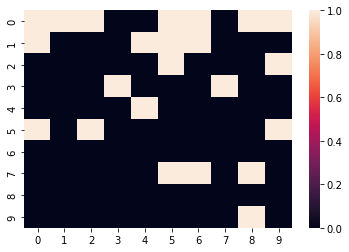

In [56]:
sns.heatmap((p_value_matrix < 0.025) & (mean_mat > 0))

What is the probability of falsely rejecting the null hypothesis in each cell? What is the probability of falsely rejecting the null hypothesis in at least one of the cells (i.e. what is the **family wise error rate**)?

In other words, given that we made $m$ experiments, with confidence level $\alpha$, what is the probabilty $\mathbb{P}\left(\bigcup_i X_i \le q_{\alpha}\right)$? 

_Note_: you may assume that sampling from different bins are independent.

In [57]:
m = 100
p = alpha / 2

p_union = 1 - ((1 - p)**m)

print(p, p_union)

0.025 0.9204827101381686


<font color = "navy">
The probability of falsely rejecting the null hypothesis in each cell is:<br>
$\alpha/2 = 0.025$ <br>
The probability of falsely rejecting the null hypothesis in at least one of the cells is:<br>
1 - (1 - $\alpha/2)^{100} = 0.92$

## Bonferroni correction 

One way of assuring that your FWER remains below $\alpha=0.05$ is to apply a <a href="https://en.wikipedia.org/wiki/Bonferroni_correction">**Bonferroni correction**</a>. This means that we set the signficance level of each individual test to $\alpha/m$, where $m=100$ is the number of tests (see, e.g., Wikipedia for an explanation). 

Use a Bonferroni correction on your segmented a/b test and output a $10\times10$ table of boolean values, indicating which test gave a significant result under this correction.

In [58]:
#p_value_matrix < (alpha/m)

How many of your tests came out significant under this correction?

In [59]:
np.sum(p_value_matrix < (alpha/m))

<ipython-input-59-28b332dabdbe>:1: RuntimeWarning: invalid value encountered in less
  np.sum(p_value_matrix < (alpha/m))


4

<font color = "navy">
Four of the tests came out significant under Bonferroni correction

Visualize your result using the [seaborn.heatmap]() function and compare to the previous heatmap.

<ipython-input-114-e2d0a235cbd1>:1: RuntimeWarning: invalid value encountered in less
  sns.heatmap(p_value_matrix < (alpha/m))


Text(0.5, 1, 'Bonferroni statistical test per sub-population')

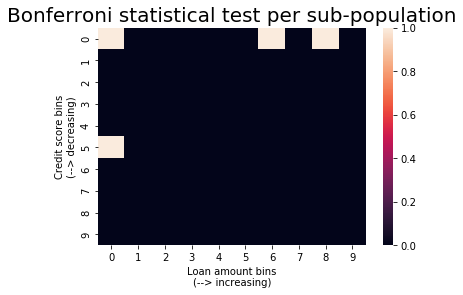

In [114]:
sns.heatmap(p_value_matrix < (alpha/m));
plt.xlabel("Loan amount bins\n(--> increasing)")
plt.ylabel("Credit score bins\n(--> decreasing)")
plt.title("Bonferroni statistical test per sub-population", size=20)

<ipython-input-61-e1a47acee63e>:1: RuntimeWarning: invalid value encountered in less
  sns.heatmap((p_value_matrix < (alpha/(2*m))) & (mean_mat > 0))


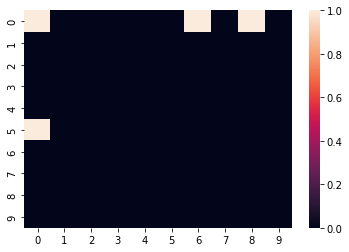

In [61]:
sns.heatmap((p_value_matrix < (alpha/(2*m))) & (mean_mat > 0))

## BH correction 

The Bonferroni correction is often criticized for being too restrictive, as you probably noticed in the last subsection. A more commonly used method for correcting $\alpha$ values is the Benjamini-Hochberg method. You can <a href="https://www.youtube.com/watch?v=K8LQSvtjcEo">check out the quest</a> for a nice explanation about it.

Start by arranging the $p$-values of your original test as a series and listing them in ascending order. You can use the `pd.DataFrame.stack` and `pd.Series.sort_values` methods.

In [89]:
p_value_ser = pd.Series(p_value_matrix.reshape(100)).sort_values()
p_value_ser = p_value_ser.reset_index()
p_value_ser.index = np.array(range(1, 101))
p_value_ser.columns = ['org_index', 'p_value']
p_value_ser

,org_index,p_value
1,8,0.000006
2,6,0.000067
3,0,0.000161
4,50,0.000222
5,5,0.000676
...,...,...
96,81,0.843292
97,45,0.873560
98,86,0.892053
99,61,0.966930


Plot your sorted $p$-values

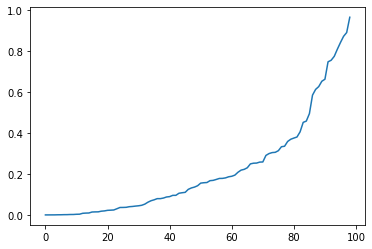

In [90]:
plt.plot(p_value_ser['p_value'].values)

For each entry of the new series, compute the value compute the value $\frac{i}{m}\cdot\alpha$, where $i$ is the ordinal place of the entry (i.e. 1,2,...len(series)), $m=100$ and $\alpha=0.05$ as above. Add a plot of these values to your $p$-values plot.

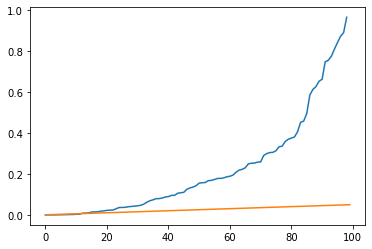

In [91]:
p_value_ser['bh_value'] = alpha * p_value_ser.index / m
plt.plot(p_value_ser['p_value'].values)
plt.plot(p_value_ser['bh_value'].values)


Find the largest index $i$ for which the $p$-value in the $i$-th place in the series is smaller than $\frac{i}{m}\cdot\alpha$. That is- the last index in the plot you just created where the $p$-values line lies below the _adjusted_-$\alpha$ line.

In [100]:
max_ind = p_value_ser[p_value_ser.p_value < p_value_ser.bh_value].index.max()
print(max_ind)
p_value_ser.head(12)

12


,org_index,p_value,bh_value
1,8,0.000006,0.0005
2,6,0.000067,0.0010
3,0,0.000161,0.0015
4,50,0.000222,0.0020
5,5,0.000676,0.0025
6,1,0.000791,0.0030
7,15,0.001264,0.0035
8,2,0.001365,0.0040
9,10,0.002028,0.0045
10,52,0.002139,0.0050


Reject the null hypothesis for all test before and including this index, and accept it for all others. Reformat your table into a $10\times 10$ dataframe; for which bins did we get a significant result in the corrected test?

In [107]:
res = np.zeros((100))
res[p_value_ser[p_value_ser.index <= max_ind]["org_index"]] = 1
res

array([1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [112]:
res = res.reshape((10, 10))

Visualize your result using the [seaborn.heatmap]() function and compare to the previous heatmap.

Text(0.5, 1, 'BH statistical test per sub-population')

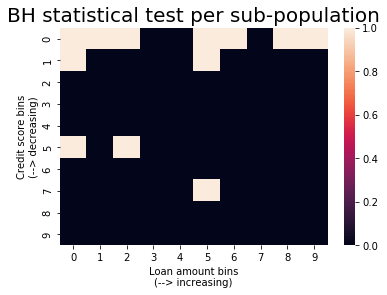

In [115]:
sns.heatmap(res);
plt.xlabel("Loan amount bins\n(--> increasing)")
plt.ylabel("Credit score bins\n(--> decreasing)")
plt.title("BH statistical test per sub-population", size=20)

### Validating your results

You can validate your results (for both corrections) using the <a href= "https://www.statsmodels.org/dev/generated/statsmodels.stats.multitest.multipletests.html">`statsmodels.stats.multitest.multipletests`</a> package.

In [69]:
from statsmodels.stats.multitest import multipletests

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/multitest.py:150: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals <= alphacBonf
/usr/local/lib/python3.8/dist-packages/statsmodels/stats/multitest.py:257: RuntimeWarning: invalid value encountered in greater
  pvals_corrected[pvals_corrected>1] = 1


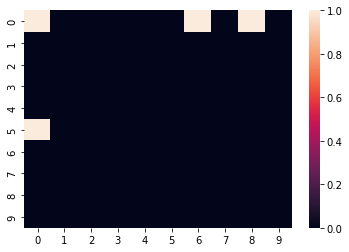

In [70]:
test_result = multipletests(p_value_matrix.reshape((100)), alpha, 'bonferroni', is_sorted=False)
sns.heatmap(test_result[0].reshape((10, 10)))

/usr/local/lib/python3.8/dist-packages/statsmodels/stats/multitest.py:339: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha


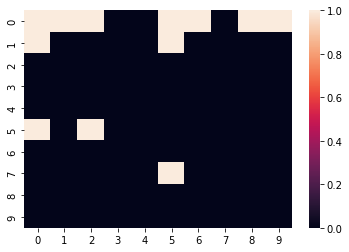

In [71]:
test_result = multipletests(p_value_matrix.reshape((100)), alpha, 'fdr_bh', is_sorted=False)
sns.heatmap(test_result[0].reshape((10, 10)))